# Import data

In [129]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
from datetime import datetime
import datetime as dt
from sklearn import preprocessing

In [6]:
df = pd.read_csv("project_catgory_data.csv")
df.head(2)

C:\Users\lijia\AppData\Local\Temp\ipykernel_21604\3317619713.py:1: DtypeWarning: Columns (24,25,27,28,40,41,50,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("project_catgory_data.csv")


,id,state,url_project,url_project_short,name,country,creator_id,location_id,category_id,created_at,...,video_id,video_url_high,video_url_webm,video_height,video_width,video_status,file_name,last_modification,deleted_comments,parent_category
0,22807353,canceled,https://www.kickstarter.com/projects/mikewood/...,http://kck.st/1UNDF6C,"ViperSharp, The Best Precision Knife Sharpener...",US,1750652465,23418188.0,28,1453170931,...,657517.0,https://ksr-video.imgix.net/projects/2289308/v...,https://ksr-video.imgix.net/projects/2289308/v...,360.0,640.0,successful,www.kickstarter.com/projects/mikewood/vipersha...,2018-05-24 02:33:34,0.0,design/product design
1,22810934,successful,https://www.kickstarter.com/projects/cavinboun...,http://kck.st/17xiZX3,"Lights, Coma, Action!",US,1157451606,2357536.0,48,1380594589,...,297295.0,https://ksr-video.imgix.net/projects/700251/vi...,https://ksr-video.imgix.net/projects/700251/vi...,360.0,640.0,successful,www.kickstarter.com/projects/cavinbounce/light...,2018-05-24 02:26:07,0.0,publishing/nonfiction


In [7]:
print('Row count is:', len(df.index))

Row count is: 408637


In [8]:
print(len(df.columns))

58


In [9]:
#split parent_category column, rename parent category as p_category
df[['p_category', 'sub_category']] = df['parent_category'].str.split('/', expand=True)
df.head(2)

# Divde and Clean data

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df.isnull().sum()

id                                                0
state                                             0
url_project                                       0
url_project_short                                 0
name                                              3
country                                           0
creator_id                                        0
location_id                                    1759
category_id                                       0
created_at                                        0
deadline                                          0
updated_at                                        0
state_changed_at                                  0
successful_at                                253507
launched_at                                       0
goal                                              0
pledged                                           0
currency                                          0
currency_symbol                                   0
usd_pledged 

In [14]:
df.drop_duplicates()

,id,state,url_project,url_project_short,name,country,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,successful_at,launched_at,goal,pledged,currency,currency_symbol,usd_pledged,static_usd_rate,backers_count,comments_count,updates_count,spotlight,staff_pick,blurb,currency_trailing_code,disable_communication,photo_url,profile_background_color,profile_background_image_opacity,profile_blurb,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,slug,url_rewards,url_updates,video_id,video_url_high,video_url_webm,video_height,video_width,video_status,file_name,last_modification,deleted_comments,parent_category,p_category,sub_category
0,22807353,canceled,https://www.kickstarter.com/projects/mikewood/...,http://kck.st/1UNDF6C,"ViperSharp, The Best Precision Knife Sharpener...",US,1750652465,23418188.0,28,1453170931,1462402800,1472168774,1461010001,NaN,1458918033,10000.0,31131.00,USD,$,31131.00000,1.000000,255,53,22,False,False,The ViperSharp offers infinite angles for shar...,True,False,https://ksr-ugc.imgix.net/assets/012/357/781/2...,NaN,0.8,NaN,2328882,NaN,NaN,NaN,NaN,NaN,2328882,True,False,inactive,1453170931,NaN,vipersharp-the-best-precision-knife-sharpener,https://www.kickstarter.com/projects/mikewood/...,https://www.kickstarter.com/projects/mikewood/...,657517.0,https://ksr-video.imgix.net/projects/2289308/v...,https://ksr-video.imgix.net/projects/2289308/v...,360.0,640.0,successful,www.kickstarter.com/projects/mikewood/vipersha...,2018-05-24 02:33:34,0.0,design/product design,design,product design
1,22810934,successful,https://www.kickstarter.com/projects/cavinboun...,http://kck.st/17xiZX3,"Lights, Coma, Action!",US,1157451606,2357536.0,48,1380594589,1383413613,1488327585,1383413613,1.383414e+09,1380821613,15000.0,18167.88,USD,$,18167.88000,1.000000,284,4,40,True,False,A book to tell the story of who I was (LIGHTS)...,True,False,https://ksr-ugc.imgix.net/assets/011/584/530/2...,NaN,0.8,A book to tell the story of how I sustained a ...,716409,NaN,Adventures in Brain Injury,NaN,http://www.adventuresinbraininjury.com,"Lights, Coma, Action!",716409,True,False,active,1432157366,NaN,lights-coma-action,https://www.kickstarter.com/projects/cavinboun...,https://www.kickstarter.com/projects/cavinboun...,297295.0,https://ksr-video.imgix.net/projects/700251/vi...,https://ksr-video.imgix.net/projects/700251/vi...,360.0,640.0,successful,www.kickstarter.com/projects/cavinbounce/light...,2018-05-24 02:26:07,0.0,publishing/nonfiction,publishing,nonfiction
2,22821161,failed,https://www.kickstarter.com/projects/684178251...,https://www.kickstarter.com/projects/684178251...,Sentio Golf Putters: Feel IS the difference,US,684178251,2351810.0,28,1433725049,1446429290,1463739059,1446429290,NaN,1442537690,50000.0,9707.00,USD,$,9707.00000,1.000000,41,0,4,False,False,Choose the feel YOU want with our patented flo...,True,False,https://ksr-ugc.imgix.net/assets/012/161/151/b...,NaN,0.8,NaN,1945377,NaN,NaN,NaN,NaN,NaN,1945377,True,False,inactive,1433725049,NaN,sentio-golf-putters-feel-is-the-difference,https://www.kickstarter.com/projects/684178251...,https://www.kickstarter.com/projects/684178251...,579025.0,https://ksr-video.imgix.net/projects/1905803/v...,https://ksr-video.imgix.net/projects/1905803/v...,480.0,640.0,successful,www.kickstarter.com/projects/684178251/sentio-...,2017-03-11 01:20:37,NaN,design/product design,design,product design
3,22823613,failed,https://www.kickstarter.com/projects/123754320...,http://kck.st/2kL47iy,Brainade,US,1237543205,2497409.0,342,1486073091,1489778686,1489778687,1489778687,NaN,1487190286,750.0,1.00,USD,$,1.00000,1.000000,1,0,0,False,False,We intend to create an online platform for ind...,True,False,https://ksr-ugc.imgix.net/assets/015/387/055/f...,NaN,0.8,NaN,2862898,NaN,NaN,NaN,Na

In [9]:
df.head(2)

,id,state,url_project,url_project_short,name,country,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,successful_at,launched_at,goal,pledged,currency,currency_symbol,usd_pledged,static_usd_rate,backers_count,comments_count,updates_count,spotlight,staff_pick,blurb,currency_trailing_code,disable_communication,photo_url,profile_background_color,profile_background_image_opacity,profile_blurb,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,slug,url_rewards,url_updates,video_id,video_url_high,video_url_webm,video_height,video_width,video_status,file_name,last_modification,deleted_comments
0,22807353,canceled,https://www.kickstarter.com/projects/mikewood/...,http://kck.st/1UNDF6C,"ViperSharp, The Best Precision Knife Sharpener...",US,1750652465,23418188.0,28,1453170931,1462402800,1472168774,1461010001,NaN,1458918033,10000.0,31131.00,USD,$,31131.00,1.0,255,53,22,False,False,The ViperSharp offers infinite angles for shar...,True,False,https://ksr-ugc.imgix.net/assets/012/357/781/2...,NaN,0.8,NaN,2328882,NaN,NaN,NaN,NaN,NaN,2328882,True,False,inactive,1453170931,NaN,vipersharp-the-best-precision-knife-sharpener,https://www.kickstarter.com/projects/mikewood/...,https://www.kickstarter.com/projects/mikewood/...,657517.0,https://ksr-video.imgix.net/projects/2289308/v...,https://ksr-video.imgix.net/projects/2289308/v...,360.0,640.0,successful,www.kickstarter.com/projects/mikewood/vipersha...,2018-05-24 02:33:34,0.0
1,22810934,successful,https://www.kickstarter.com/projects/cavinboun...,http://kck.st/17xiZX3,"Lights, Coma, Action!",US,1157451606,2357536.0,48,1380594589,1383413613,1488327585,1383413613,1.383414e+09,1380821613,15000.0,18167.88,USD,$,18167.88,1.0,284,4,40,True,False,A book to tell the story of who I was (LIGHTS)...,True,False,https://ksr-ugc.imgix.net/assets/011/584/530/2...,NaN,0.8,A book to tell the story of how I sustained a ...,716409,NaN,Adventures in Brain Injury,NaN,http://www.adventuresinbraininjury.com,"Lights, Coma, Action!",716409,True,False,active,1432157366,NaN,lights-coma-action,https://www.kickstarter.com/projects/cavinboun...,https://www.kickstarter.com/projects/cavinboun...,297295.0,https://ksr-video.imgix.net/projects/700251/vi...,https://ksr-video.imgix.net/projects/700251/vi...,360.0,640.0,successful,www.kickstarter.com/projects/cavinbounce/light...,2018-05-24 02:26:07,0.0


In [114]:
#drop useless columns
df_new = df.drop(['url_project','url_project_short','currency_symbol','name','blurb','photo_url','successful_at','profile_background_color','profile_blurb','profile_link_background_color','profile_link_text','profile_link_text_color',
            'profile_link_url','profile_name','profile_text_color','slug','url_rewards','url_updates','video_url_high','video_url_webm','file_name',
           'currency','static_usd_rate','pledged','profile_id','profile_project_id','profile_should_show_feature_image_section',
            'video_status','last_modification','video_id','creator_id','location_id','category_id','deleted_comments','video_height','video_width','sub_category','parent_category'], axis=1)

In [115]:
df_new.isnull().sum()

id                                  0
state                               0
country                             0
created_at                          0
deadline                            0
updated_at                          0
state_changed_at                    0
launched_at                         0
goal                                0
usd_pledged                         0
backers_count                       0
comments_count                      0
updates_count                       0
spotlight                           0
staff_pick                          0
currency_trailing_code              0
disable_communication               0
profile_background_image_opacity    0
profile_show_feature_image          0
profile_state                       0
profile_state_changed_at            0
p_category                          0
dtype: int64

In [116]:
df_new.head(2)

,id,state,country,created_at,deadline,updated_at,state_changed_at,launched_at,goal,usd_pledged,backers_count,comments_count,updates_count,spotlight,staff_pick,currency_trailing_code,disable_communication,profile_background_image_opacity,profile_show_feature_image,profile_state,profile_state_changed_at,p_category
0,22807353,canceled,US,1453170931,1462402800,1472168774,1461010001,1458918033,10000.00,31131.00,255,53,22,False,False,True,False,0.80,False,inactive,1453170931,design
1,22810934,successful,US,1380594589,1383413613,1488327585,1383413613,1380821613,15000.00,18167.88,284,4,40,True,False,True,False,0.80,False,active,1432157366,publishing


In [13]:
###### deal timestamp ###########

In [118]:
df_new['create_new'] = df_new['created_at'].apply(datetime.fromtimestamp)
df_new['deadline_new'] = df_new['deadline'].apply(datetime.fromtimestamp)
df_new['update_new'] = df_new['updated_at'].apply(datetime.fromtimestamp)
df_new['state_changed_new'] = df_new['state_changed_at'].apply(datetime.fromtimestamp)
df_new['launched_new'] = df_new['launched_at'].apply(datetime.fromtimestamp)
df_new['profile_state_changed_new'] = df_new['profile_state_changed_at'].apply(datetime.fromtimestamp)

df_new = df_new.drop(['created_at','deadline','updated_at','state_changed_at','launched_at','profile_state_changed_at'] , axis=1)

In [119]:
df_new.head(2)

,id,state,country,goal,usd_pledged,backers_count,comments_count,updates_count,spotlight,staff_pick,currency_trailing_code,disable_communication,profile_background_image_opacity,profile_show_feature_image,profile_state,p_category,create_new,deadline_new,update_new,state_changed_new,launched_new,profile_state_changed_new
0,22807353,canceled,US,10000.00,31131.00,255,53,22,False,False,True,False,0.80,False,inactive,design,2016-01-18 21:35:31,2016-05-04 19:00:00,2016-08-25 19:46:14,2016-04-18 16:06:41,2016-03-25 11:00:33,2016-01-18 21:35:31
1,22810934,successful,US,15000.00,18167.88,284,4,40,True,False,True,False,0.80,False,active,publishing,2013-09-30 22:29:49,2013-11-02 13:33:33,2017-02-28 19:19:45,2013-11-02 13:33:33,2013-10-03 13:33:33,2015-05-20 17:29:26


In [120]:
#change state value into categorical
df_new['state'].unique()
df_new['state'] = df_new['state'].replace(['successful', 'canceled','failed','suspended','purged','live'], 
                                  [1, 0, 0, 0, 0, 0])

In [121]:
#come up with date difference
df_new['project_duration'] =  (df_new['deadline_new'].dt.date -df_new['create_new'].dt.date).dt.days

In [122]:
#format columns
df_new['spotlight'].unique()
df_new['spotlight'] = df_new['spotlight'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['spotlight'] = df_new['spotlight'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['spotlight'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [123]:
df_new['staff_pick'] = df_new['staff_pick'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['staff_pick'] = df_new['staff_pick'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['staff_pick'] = df_new['staff_pick'].replace(['False', 'True'], 
                                  ['False', 'True'])
df_new['staff_pick'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [124]:
df_new['disable_communication'] = df_new['disable_communication'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['disable_communication'] = df_new['disable_communication'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['disable_communication'] = df_new['disable_communication'].replace(['False', 'True'], 
                                  ['False', 'True'])
df_new['disable_communication'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [125]:
df_new['profile_show_feature_image'] = df_new['profile_show_feature_image'].replace(['False', 'True','False','True'], 
                                  [0, 1, 0, 1])
df_new['profile_show_feature_image'] = df_new['profile_show_feature_image'].replace(['0', '1'], 
                                  ['False', 'True'])
df_new['profile_show_feature_image'] = df_new['profile_show_feature_image'].replace(['False', 'True'], 
                                  ['False', 'True'])
df_new['profile_show_feature_image'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [126]:
#drop useless date
df_new = df_new.drop(['create_new','deadline_new','update_new','state_changed_new','launched_new','profile_state_changed_new','currency_trailing_code'], axis=1)

In [127]:
df_new.head(2)

,id,state,country,goal,usd_pledged,backers_count,comments_count,updates_count,spotlight,staff_pick,disable_communication,profile_background_image_opacity,profile_show_feature_image,profile_state,p_category,project_duration
0,22807353,0,US,10000.00,31131.00,255,53,22,False,False,False,0.80,False,inactive,design,107
1,22810934,1,US,15000.00,18167.88,284,4,40,True,False,False,0.80,False,active,publishing,33


# EDA

In [42]:
#statistical analysis for project size（measured using variable：goal）
pd.set_option('display.float_format', lambda x: '%.2f' % x) #get rid of scientific notation
df_new['goal'].describe()

count      408637.00
mean        50277.61
std       1170798.94
min             0.01
25%          2000.00
50%          5200.00
75%         16000.00
max     100000000.00
Name: goal, dtype: float64

In [58]:
# goal=df_new['goal']
# goal
# #goal.dtypes

0         10000.00
1         15000.00
2         50000.00
3           750.00
4          7000.00
            ...   
408632     2000.00
408633   315000.00
408634      300.00
408635    13000.00
408636    15000.00
Name: goal, Length: 408637, dtype: float64

In [43]:
#statistical analysis for actual amount people have pleadged
df_new['usd_pledged'].describe()

count     408637.00
mean        9932.58
std        92920.10
min           -2.00
25%           44.76
50%          746.00
75%         4468.32
max     20338986.27
Name: usd_pledged, dtype: float64

In [30]:
#1：number of sucessful project ，0：number of unsucessful project
ycount=df_new['state'].value_counts()
ycount

0    253507
1    155130
Name: state, dtype: int64

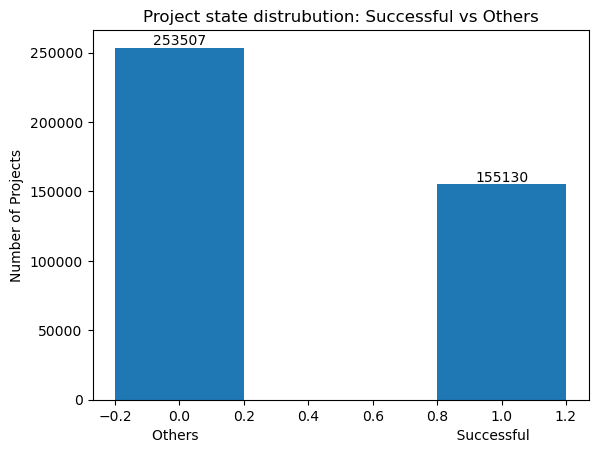

In [31]:
# draw a bar chart for y-variable
xs = ycount.index.astype("object")
ys = ycount
plt.bar(xs, ys, width = 0.4)

for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel("Others                                                           Successful")
plt.ylabel("Number of Projects")
plt.title("Project state distrubution: Successful vs Others")
plt.show()

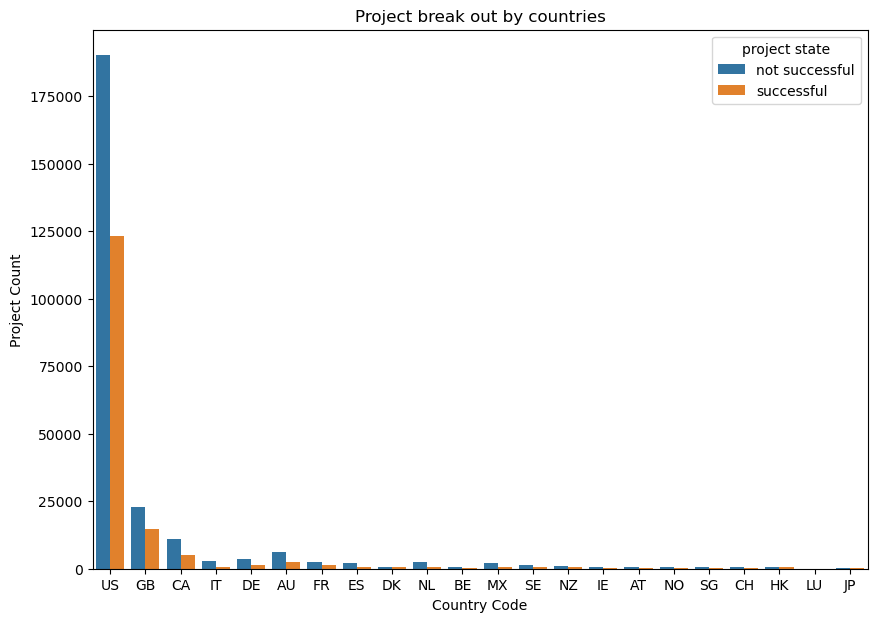

In [76]:
f = plt.figure(figsize=(10,7))
ax = f.add_subplot(1,1,1)

sns.countplot(data=df_new, x=df_new['country'], hue=df_new['state'])
ax.set_title("Project break out by countries")
ax.set_xlabel("Country Code")
ax.set_ylabel("Project Count")
ax.legend(labels = ['not successful', 'successful'], title = 'project state', loc = 'upper right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'design'),
  Text(1, 0, 'publishing'),
  Text(2, 0, 'technology'),
  Text(3, 0, 'comics'),
  Text(4, 0, 'music'),
  Text(5, 0, 'games'),
  Text(6, 0, 'art'),
  Text(7, 0, 'film & video'),
  Text(8, 0, 'photography'),
  Text(9, 0, 'crafts'),
  Text(10, 0, 'fashion'),
  Text(11, 0, 'food'),
  Text(12, 0, 'theater'),
  Text(13, 0, 'dance'),
  Text(14, 0, 'journalism')])

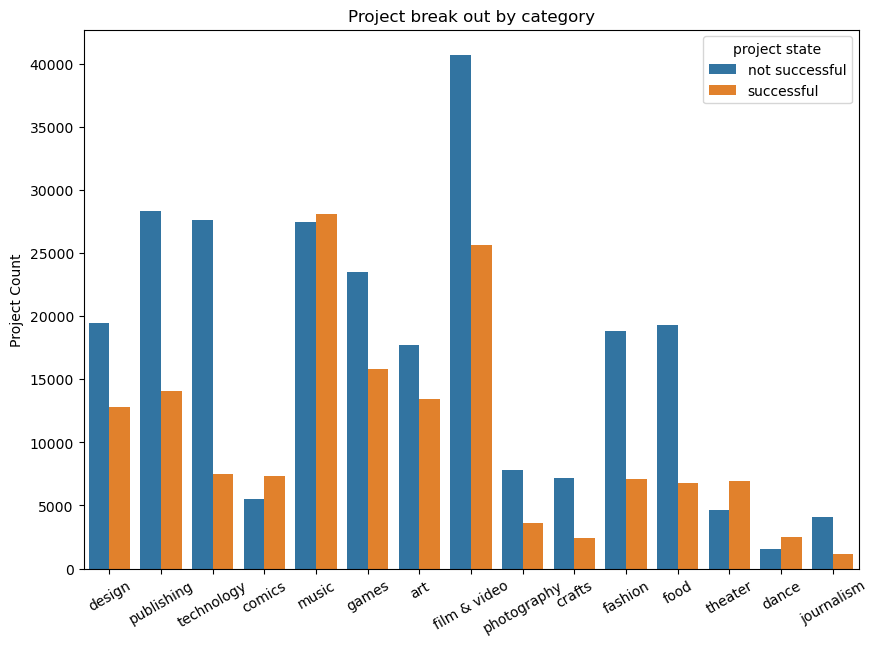

In [77]:
f = plt.figure(figsize=(10,7))
ax = f.add_subplot(1,1,1)

sns.countplot(data=df, x=df_new['p_category'], hue=df_new['state'])
ax.set_title("Project break out by category")
#ax.set_xlabel("Project category")
ax.set(xlabel=None)
ax.set_ylabel("Project Count")
ax.legend(labels = ['not successful', 'successful'], title = 'project state', loc = 'upper right')
plt.xticks(rotation=30)

In [81]:
df_new['backers_count'].describe()

count   408637.00
mean       115.33
std        913.46
min         -2.00
25%          2.00
50%         14.00
75%         62.00
max     219382.00
Name: backers_count, dtype: float64

In [110]:
df_new['comments_count'].describe()

count   408637.00
mean        40.32
std       1115.13
min          0.00
25%          0.00
50%          0.00
75%          3.00
max     393425.00
Name: comments_count, dtype: float64

Text(0.5, 1.0, 'comments_count')

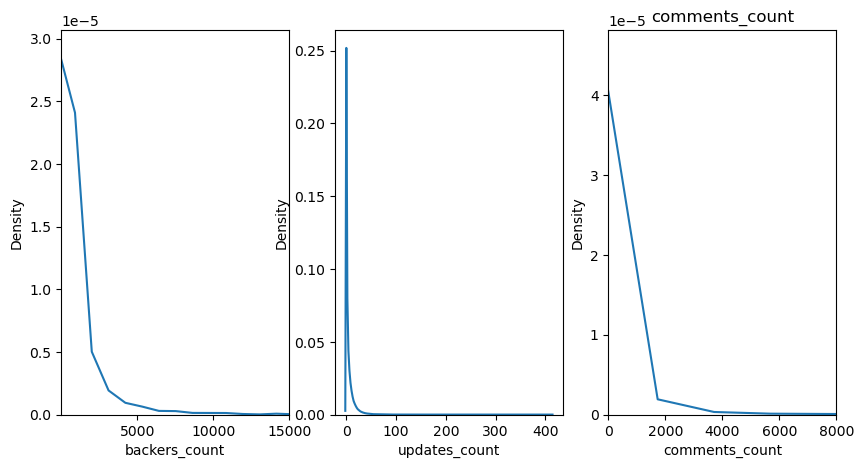

In [113]:
#density plot,for visulizing skewness, to decide whether a transformation(log or others) is needed?
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(10,5))
sns.kdeplot(df_new['backers_count'], ax=ax1)
ax1.set_xlim(1, 15000)
#plt.xlim(xmin=0, xmax = 15000)
plt.title('backers count')
#extremely right skewed

sns.kdeplot(df_new['updates_count'], ax=ax2)
plt.xlim(xmin=0, xmax = 150)
plt.title('updates count')
#extremely right skewed

sns.kdeplot(df_new['comments_count'], ax=ax3)
plt.xlim(xmin=0, xmax = 8000)
plt.title('comments_count')
#extremely right skewed

In [135]:
#variables i didn't use: spotlight,spotlight,profile_show_feature_image
df_eda= df_new[['id','state','goal','country','usd_pledged','backers_count','comments_count','updates_count','project_duration','profile_state','p_category']]
df_eda.head(2)

,id,state,goal,country,usd_pledged,backers_count,comments_count,updates_count,project_duration,profile_state,p_category
0,22807353,0,10000.00,US,31131.00,255,53,22,107,inactive,design
1,22810934,1,15000.00,US,18167.88,284,4,40,33,active,publishing


In [136]:
#write out csv for sql analysis
df_eda.to_csv('Simplified_data.csv',
               sep=',',na_rep="NA",header=True,index=False)

In [130]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'p_category'.
df_eda['p_category']= label_encoder.fit_transform(df_eda['p_category'])  
df_eda['p_category'].unique()

C:\Users\lijia\AppData\Local\Temp\ipykernel_21604\177229093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['p_category']= label_encoder.fit_transform(df_eda['p_category'])


array([ 4, 12, 13,  1, 10,  8,  0,  6, 11,  2,  5,  7, 14,  3,  9])

In [90]:
# #list all country code and number of countries
# c=list(set(df_eda['country']))
# len(c)

22

In [110]:
#label encoding country for heatmap
# # df_eda['country'] = df_eda['country'].replace(['DE','FR','IE','DK','CA','GB','US','BE','NO', 'CH','SG','AU','JP','LU','MX','NZ','ES','SE','NL','IT','HK','AT'], 
#                                   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

C:\Users\lijia\AppData\Local\Temp\ipykernel_29172\1717738398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['country'] = df_eda['country'].replace(['DE','FR','IE','DK','CA','GB','US','BE','NO', 'CH','SG','AU','JP','LU','MX','NZ','ES','SE','NL','IT','HK','AT'],


In [131]:
#label encoding country for heatmap
df_eda['country']= label_encoder.fit_transform(df_eda['country'])  
df_eda['country'].unique()

C:\Users\lijia\AppData\Local\Temp\ipykernel_21604\1946410110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['country']= label_encoder.fit_transform(df_eda['country'])


array([21,  9,  3, 12,  5,  1,  8,  7,  6, 16,  2, 15, 19, 18, 11,  0, 17,
       20,  4, 10, 14, 13])

In [111]:
#label encoding profile_state for heatmap
df_eda['profile_state'] = df_eda['profile_state'].replace(['active', 'inactive'], 
                                  [1, 0])

C:\Users\lijia\AppData\Local\Temp\ipykernel_29172\139614556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['profile_state'] = df_eda['profile_state'].replace(['active', 'inactive'],


In [99]:
#sanity check
#list(set(df_eda['profile_state']))

[0, 1]

In [132]:
X_eda=df_eda[['state','country','usd_pledged','backers_count','comments_count','updates_count','project_duration','profile_state','p_category']]

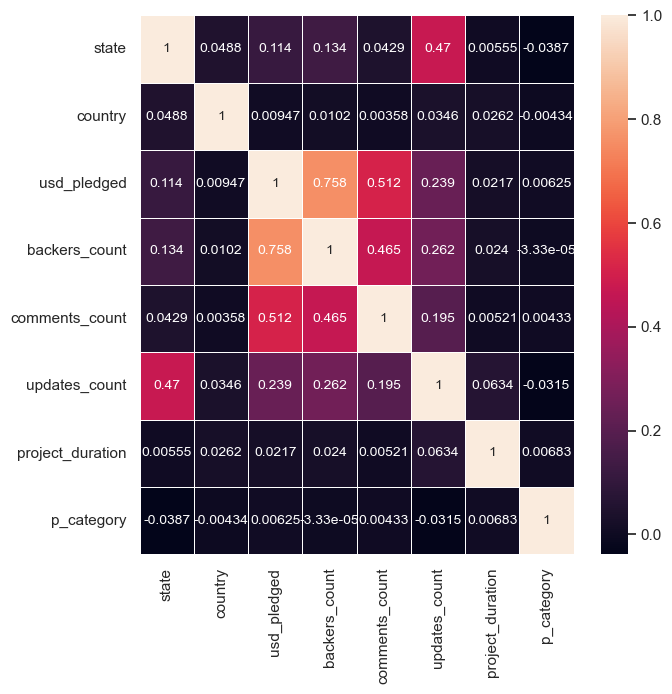

In [133]:
#heatmap to find correlations among variables
corr_matrix = X_eda.corr()
top_correlated_features = corr_matrix.index
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
plot = sns.heatmap(corr_matrix, annot = True, linewidths = .5, annot_kws={"size": 10},fmt='.3g')
# No highly correlated values

# create dummy variable

In [24]:
df_new=pd.get_dummies(df_new
               ,columns = [
                           'country',
                           'spotlight',
                           'staff_pick',
                           'disable_communication',
                           'profile_show_feature_image',
                           'profile_state'
                           ]
               ,drop_first = True
               )

In [25]:
df_new.head(2)

,id,state,goal,usd_pledged,backers_count,comments_count,updates_count,profile_background_image_opacity,project_duration,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,spotlight_True,spotlight_False,spotlight_True,staff_pick_True,staff_pick_False,staff_pick_True,disable_communication_True,disable_communication_False,disable_communication_True,profile_show_feature_image_True,profile_show_feature_image_False,profile_show_feature_image_True,profile_state_inactive
0,22807353,0,10000.0,31131.00,255,53,22,0.8,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,22810934,1,15000.0,18167.88,284,4,40,0.8,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


# Training ML model

In [166]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score                                    
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder  
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report, auc,roc_curve
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split, KFold, cross_val_score,learning_curve, ShuffleSplit, StratifiedKFold, validation_curve, GridSearchCV

In [158]:
X = df_new.loc[:, df_new.columns!='state']
y = df_new['state']

In [156]:
# split train and test
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [160]:
# split dataset into train&test sets
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,              
                                                    y, 
                                                    test_size=0.40, 
                                                    random_state=42,
                                                    shuffle=True)

In [153]:
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42) # inner cross-validation folds
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42) # outer cross-validation folds

# Train ML model

In [162]:
def find_optimum_parameters(model,parameters):

  """
  This function is used to find the optimal parameters using grid search. It takes model parameter and parameters as a 
  dictionary.
  """

  inner_cv = KFold(n_splits=4, shuffle=True) # inner cross-validation folds
  outer_cv = KFold(n_splits=4, shuffle=True) # outer cross-validation folds

  ############################## Random Forest Parameter Tuning ##############################

  gs_dt2 = GridSearchCV(estimator=model,
                    param_grid=[parameters],
                    scoring='roc_auc',
                    cv=inner_cv,
                    n_jobs=4)

  gs_dt2 = gs_dt2.fit(X,y)
  print("\n Parameter Tuning #1 - Random Forest")
  print("Non-nested CV AUC: ", gs_dt2.best_score_)
  print("Optimal Parameter: ", gs_dt2.best_params_)
  print("Optimal Estimator: ", gs_dt2.best_estimator_)
  nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X, y=y, cv=outer_cv)
  print("Nested CV AUC: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())

In [163]:
def create_submission(predictions):
  """
  This function creates the submission file
  """
  y_pred_final=pd.Series(predictions)
  submission = pd.DataFrame(columns = ['policy_id', 'TARGET'])
  submission['policy_id'] = original_df.loc[original_df.convert_ind.isnull(),'policy_id'].reset_index(drop=True)
  submission['TARGET'] = y_pred_final
  return submission

Logistic Regression Model

In [164]:
# Logistic Regression #

from sklearn import linear_model 
model=LogisticRegression(random_state=42,solver='liblinear')
parameters ={'C': [0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19 ],
                              'penalty':['l1','l2']}

find_optimum_parameters(model,parameters)    


 Parameter Tuning #1 - Random Forest
Non-nested CV AUC:  0.9999935464417304
Optimal Parameter:  {'C': 0.12, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=0.12, penalty='l1', random_state=42, solver='liblinear')
Nested CV AUC:  0.9999935409105165  +/-  1.118676490013708e-05


In [167]:
clf = linear_model.LogisticRegression(multi_class='auto', # accomondates multi-class categorical target variable
                                      C=0.14, # C parameter is the inverse of regularization strength (i.e., smaller C values 
                                      penalty='l1',
                                      random_state=42,
                                      solver='liblinear'
                                      )       # maximum number of iterations taken for the solvers to converge. Default is 100
 

clf = clf.fit(X_train, y_train)                             # model induction using the train data
# print('The weights of the attributes are:', clf.coef_)      # reports coefficients of the features in the decision function
# print('The weights of the intercepts are:', clf.intercept_) # reports intercepts in the decision function

#################################### Apply the Logistic Regression Model ####################################

# We now apply the logistic regression model to the test set
y_pred = clf.predict(X_test)             # generate classification prediction
y_pred_prob = clf.predict_proba(X_test)  # estimate class probabilities
# print('The predictions are:', y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0])) # prints first elements of arrays
auc_score1 = roc_auc_score(y_test, y_pred_prob[:, 1])
auc_score1
# print(classification_report(y_test, y_pred))
# auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# print('The AUC is:',roc_auc_score(y, clf.predict_proba(X_test)[:, 1]))

1.0

Random Forest Model

In [ ]:
from sklearn.metrics import roc_auc_score 
clf = RandomForestClassifier(n_estimators = 1100,
                             max_depth=10) 

clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
y_pred = clf.predict(X_test)             # generate classification prediction
y_pred_prob = clf.predict_proba(X_test)  # estimate class probabilities
# print('The predictions are:', y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0])) # prints first elements of arrays
auc_score1 = roc_auc_score(y_test, y_pred_prob[:, 1])
auc_score1

In [ ]:
clf_df = RandomForestClassifier(n_estimators = 400,
                             max_depth=10)

clf_df = clf_df.fit(X, y)                             

#predict for the test df(those null value target variable)
y_pred_final = clf.predict(test_df)             
y_pred_prob = clf_df.predict_proba(test_df) 